# Machine Learning - Task B

**Part of IAFIG-RMS *Python for Bioimage Analysis* Course.**

*M Kundegorski*

2019-12-13

In this task you will use regression to classify toy examples (shaped blobs) as different 'classes' or categories.

## The Task

In an experiment we were able to image lots of different types of cells. These cells are sparse so we were easily able to segment them, find their bounding box and create a database of images each containing a single cell. We then convinced a PhD student to go through and manually categorise our cells. We want to use regression to be able to automatically categorise new, unlabelled cells from future experiments.

To do this, we will:
1. Use a logistic (categorical) regression.
2. Use training data to fit the regression and test data to check how well our model works.
3. Advanced: Use visual inspection to understand what might cause problems for classification models.

## Task B.1

Run the following two cells to set-up and visualise the data. Feel free to change parameters as you explore the system.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # We will use matplotlib for plotting

import numpy as np

# Utils is a custom module written to simplify these tutorials
# You do not need to understand these codes for this practical
from utils.practice_data import generateBlobsData  # this loads data into a DataFrame
from utils.practice_data import showBlobs  # this allows quick visualisation of the data

# Generate a pandas DataFrame of data
# with a column 'class', i.e. the categry a cell belongs to,
# and a column 'raw_data' which hold the NumPy array/image
imageDir = './assets/simple_blobs/'
number_of_samples = 1200
image_size = 64  # in pixels
number_of_classes = 2 #2-6 - normal blobs. 7-11 more difficult
problem = generateBlobsData(imageDir, number_of_classes, number_of_samples, image_size, noiseSize=20)

Requested more images than available!


count     1000
unique       2
top          1
freq       500
Name: class, dtype: int64

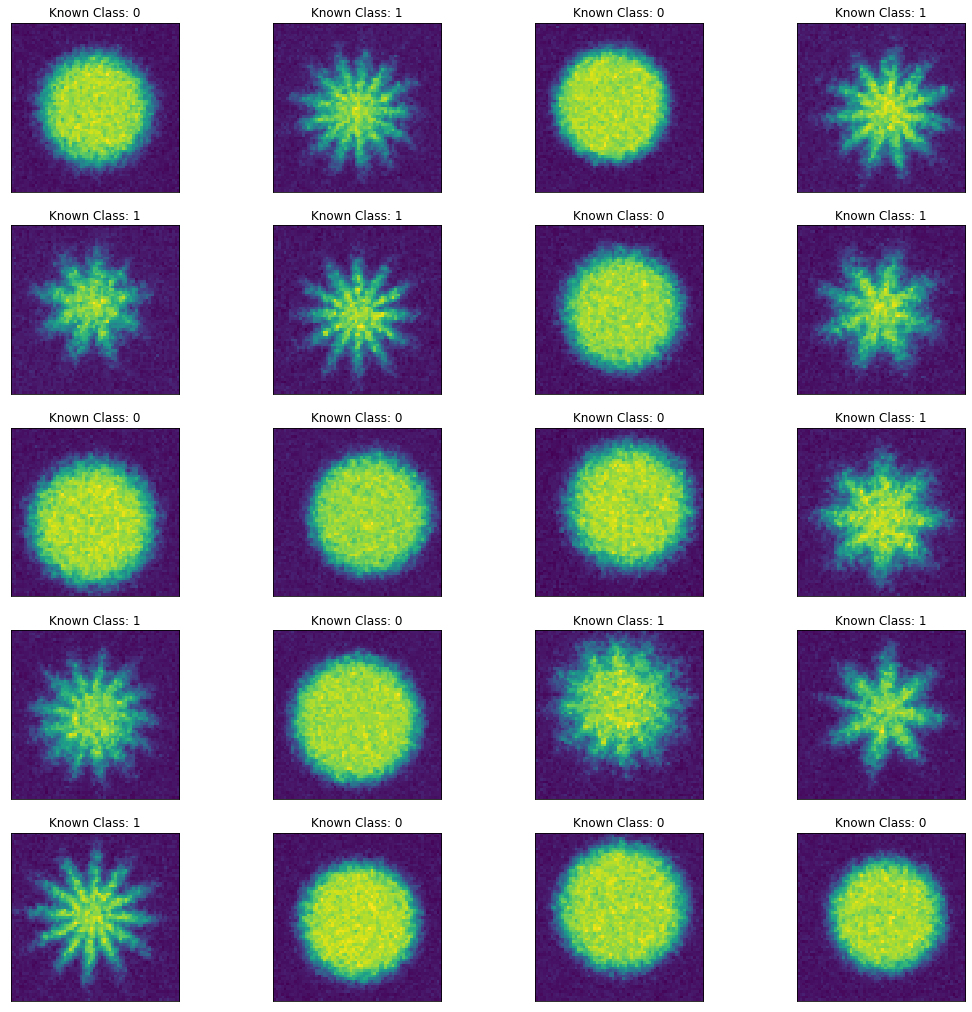

In [2]:
#Visualise the data
display(problem.loc[:,'class'].describe())  # describe classes; note the number of unique classes
showBlobs(problem.sample(20))  # plots the images with their class above.

## Task B.2

Look at the documentation for [sklearn.linear_model.LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and, specifically, this example: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py.

The following cell needs to 'wrangle' our data into training and test data and then run Logistic Regression to create a simple model with which we can predict the classes of our test data and calculate a 'score', here the mean accuracy, of our model.

Complete the following code cell by filling in all the `____`s with appropriate methods/functions and parameters.

In [3]:
from sklearn import linear_model
from sklearn import model_selection

# Data wrangling
x = np.stack(problem.loc[:,'raw_data'])  # Stack all images into an array 'x'
x = x.reshape(x.shape[0], -1)  # Convert individual 2D images into 1D vectors
y = problem.loc[:,'class'].values.astype(int)  # Convert classes to int

# Split data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

# Initialise Logistic Regression
logreg = linear_model.LogisticRegression(random_state=0)

# Fit to training data
logreg.fit(x_train, y_train)

# Predict the classes for our test data
y_predict = logreg.predict(x_test)

# Calculate the mean accuracy to score our model.
test_set_score = logreg.score(x_test, y_test)
train_set_score = logreg.score(x_train, y_train)
print("Score on training set: {} and on testing: {} ".format(train_set_score,test_set_score))

/Users/mix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score on training set: 1.0 and on testing: 0.995 


Create a new cell below where you display the results (on your test data) of the model. Does the model look good?

Run the following cell to plot the True/False rates for our prediction. Note that this works for two classes only.

Correct classification of Logistic Regression: 99.50%


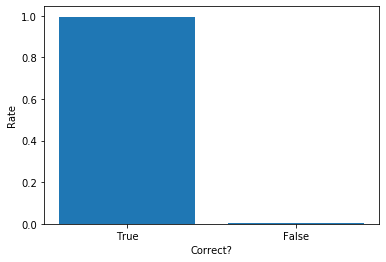

In [4]:
f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

TF = y_test==y_predict  # create True/False list to see how often we're correct
trueRate = TF.sum()/TF.size  # as True==1, the sum is the same as the count (as percent)
falseRate = (TF.size - TF.sum())/TF.size  # and everything else is False (as percent)

print('Correct classification of Logistic Regression: {0:.2%}'.format(trueRate))  # Works for 2 cell types only

axis.bar(['True','False'],[trueRate,falseRate])
axis.set_ylabel('Rate')
axis.set_xlabel('Correct?')
plt.show()

## Advanced Task B.3

Change the number of cell classes in our training data from 2 to a number between 2 and 6 (inclusive). Rerun the Logistic Regression (all cells above), how does the model deal with more classes.

Repeat for a number between 7 and 11 (inclusive). Look at the plotted sample data, can you see why Logistic Regression may not be able to distinguish certain categories?